<a href="https://colab.research.google.com/github/DJCordhose/ai/blob/master/notebooks/2019_tf/autoencoders_tabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoders on Tabular Data

* Losses
   * https://keras.io/losses/
   * Predefined loss functions: https://github.com/keras-team/keras/blob/master/keras/losses.py
   * Example custom loss function: https://stackoverflow.com/questions/43818584/custom-loss-function-in-keras
   * Loss function that is not f(y_true, y_pred): https://github.com/keras-team/keras/issues/2662
* Having more than one input/output, combined losses: https://keras.io/getting-started/functional-api-guide/
* Normalizaing data: https://www.tensorflow.org/api_docs/python/tf/keras/utils/normalize   

In [1]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

1.12.0


# Loading and exploring our data set

This is a database of customers of an insurance company. Each data point is one customer. The group represents the number of accidents the customer has been involved with in the past

* 0 - red: many accidents
* 1 - green: few or no accidents
* 2 - yellow: in the middle        

In [2]:
!curl -O https://raw.githubusercontent.com/DJCordhose/deep-learning-crash-course-notebooks/master/data/insurance-customers-1500.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26783  100 26783    0     0  91722      0 --:--:-- --:--:-- --:--:-- 91722


In [0]:
import pandas as pd

df = pd.read_csv('./insurance-customers-1500.csv', sep=';')

In [4]:
df.describe()

,speed,age,miles,group
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,122.492667,44.980667,30.434000,0.998667
std,17.604333,17.130400,15.250815,0.816768
min,68.000000,16.000000,1.000000,0.000000
25%,108.000000,32.000000,18.000000,0.000000
50%,120.000000,42.000000,29.000000,1.000000
75%,137.000000,55.000000,42.000000,2.000000
max,166.000000,100.000000,84.000000,2.000000


In [56]:
df.head()

,speed,age,miles,group
0,98.0,44.0,25.0,1
1,118.0,54.0,24.0,1
2,111.0,26.0,34.0,0
3,97.0,25.0,10.0,2
4,114.0,38.0,22.0,1


In [0]:
sns.pairplot?

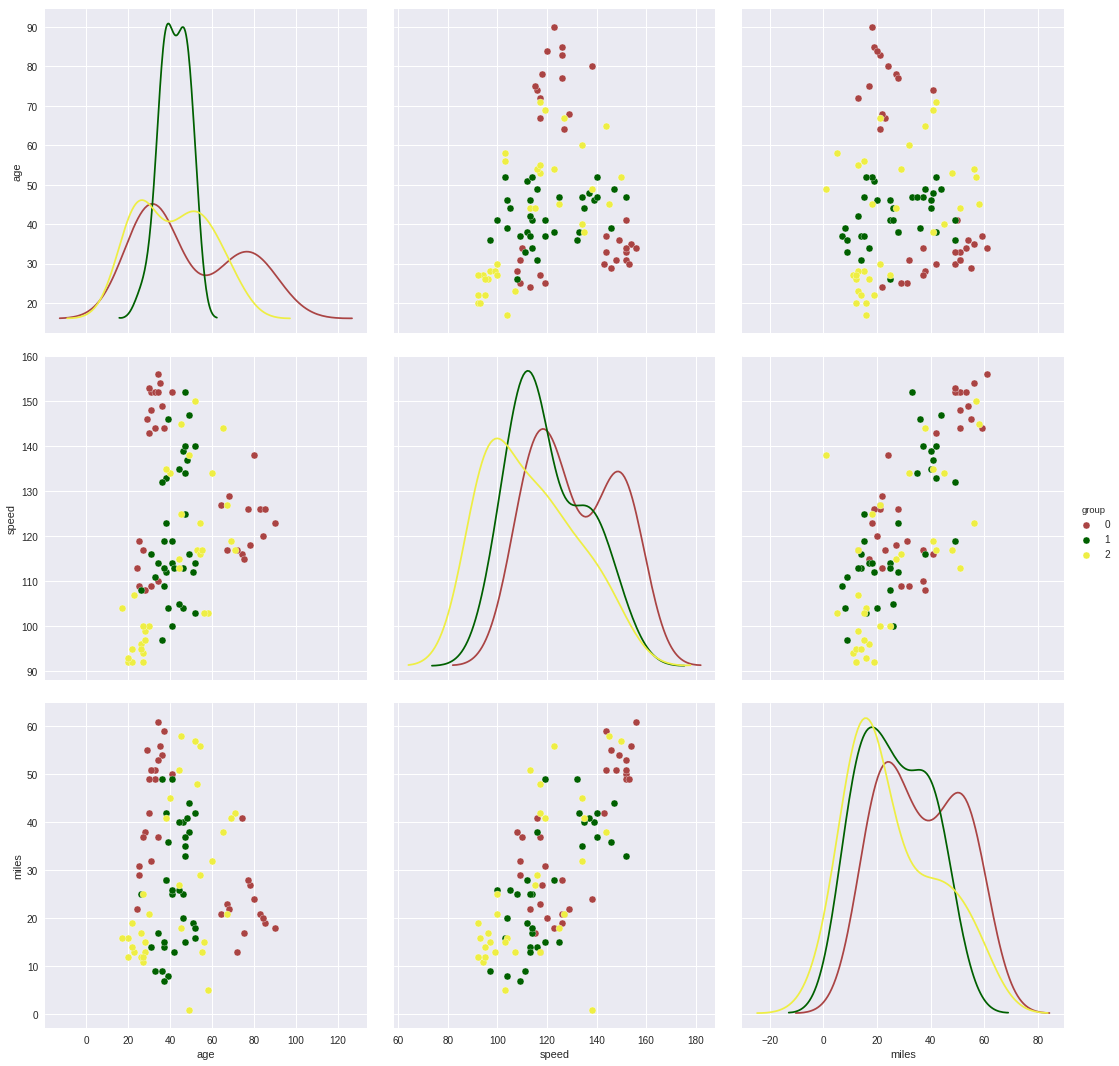

In [66]:
import seaborn as sns

sample_df = df.sample(n=100, random_state=42)
sns.pairplot(sample_df, 
             hue="group", palette={0: '#AA4444', 1: '#006000', 2: '#EEEE44'},
#              kind='reg',
             size=5,
             diag_kind='kde',
             vars=['age', 'speed', 'miles'])

In [8]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Flatten, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Sequential, Model

encoding_dim = 32

input_data = Input(shape=(4,))
encoded = Dense(units=encoding_dim, activation='relu', name="encoder")(input_data)
decoded = Dense(units=4, activation='linear', name="decoder")(encoded)

autoencoder = Model(inputs=input_data, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary();

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
encoder (Dense)              (None, 32)                160       
_________________________________________________________________
decoder (Dense)              (None, 4)                 132       
Total params: 292
Trainable params: 292
Non-trainable params: 0
_________________________________________________________________


In [9]:
X = df
BATCH_SIZE = 2
%time history = autoencoder.fit(X, X, epochs=10, batch_size=BATCH_SIZE, shuffle=True, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 360.4120
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.3910
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3747
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2057
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1013
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0523
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0259
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0156
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0107
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0081
CPU times: user 33.6 s, sys: 5.05 s, total: 38.6 s
Wall time: 27.6 s


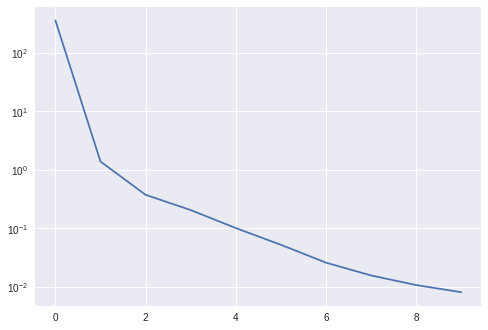

In [11]:
import matplotlib.pyplot as plt

plt.yscale('log')
plt.plot(history.history['loss'])

In [12]:
autoencoder.evaluate(X, X, batch_size=BATCH_SIZE)

1500/1500 [==============================] - 1s 661us/step


0.002327561131154653

In [27]:
samples = df.sample(10).reset_index(drop=True)
samples

,speed,age,miles,group
0,99.0,22.0,10.0,2
1,107.0,47.0,12.0,1
2,95.0,24.0,17.0,2
3,104.0,41.0,22.0,1
4,104.0,25.0,17.0,2
5,116.0,31.0,14.0,1
6,106.0,28.0,18.0,1
7,113.0,40.0,47.0,1
8,128.0,39.0,13.0,0
9,143.0,48.0,39.0,1


In [31]:
predictions = pd.DataFrame(autoencoder.predict(samples), columns=["speed",	"age",	"miles",	"group"])
predictions

,speed,age,miles,group
0,99.012840,22.019787,10.012078,2.036093
1,106.987427,47.010281,12.012354,1.023756
2,95.039627,24.025970,17.003225,2.049709
3,104.026917,41.022007,22.002546,1.045943
4,104.011856,25.019482,17.011662,2.034433
5,115.982315,31.014114,14.019916,1.024615
6,106.024857,28.024952,18.007732,1.048129
7,113.062004,40.032990,46.993095,1.063661
8,127.955544,39.009007,13.026673,0.015710
9,142.945145,48.003635,39.026817,0.998953


In [32]:
samples.subtract(predictions)

,speed,age,miles,group
0,-0.012840,-0.019787,-0.012078,-0.036093
1,0.012573,-0.010281,-0.012354,-0.023756
2,-0.039627,-0.025970,-0.003225,-0.049709
3,-0.026917,-0.022007,-0.002546,-0.045943
4,-0.011856,-0.019482,-0.011662,-0.034433
5,0.017685,-0.014114,-0.019916,-0.024615
6,-0.024857,-0.024952,-0.007732,-0.048129
7,-0.062004,-0.032990,0.006905,-0.063661
8,0.044456,-0.009007,-0.026673,-0.015710
9,0.054855,-0.003635,-0.026817,0.001047


## Looks quite nice, but how impressed are you by abstracting 4 variables into 32?

Let us try dimension of 2

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 3789.0982
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2414.0863
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1548.2444
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 982.8927
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 613.7146
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 390.8852
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 274.8641
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 226.7536
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 212.2813
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step - loss: 209.4829
CPU times: user 33.2 s, sys: 4.74 s, total: 37.9 s
Wall time: 26.9 s


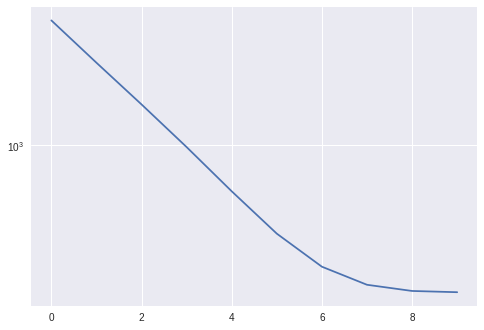

In [33]:
encoding_dim = 2

input_data = Input(shape=(4,))
# notice tanh
encoded = Dense(units=encoding_dim, activation='tanh', name="encoder")(input_data)
decoded = Dense(units=4, activation='linear', name="decoder")(encoded)

autoencoder = Model(inputs=input_data, outputs=decoded)
# this does not get much better than 210 as a loss (bad), so we can just as well get there a bit faster (10 instead of 50 epochs with standard lr)
adam = keras.optimizers.Adam(lr=0.01)
# adam = keras.optimizers.Adam()
autoencoder.compile(optimizer=adam, loss='mse')
BATCH_SIZE = 2
%time history = autoencoder.fit(X, X, epochs=10, batch_size=BATCH_SIZE, shuffle=True, verbose=1)
plt.yscale('log')
plt.plot(history.history['loss'])

In [34]:
autoencoder.evaluate(X, X, batch_size=BATCH_SIZE)

1500/1500 [==============================] - 1s 667us/step


209.08106483968098

In [35]:
# just average over all of them :D
predictions = pd.DataFrame(autoencoder.predict(samples), columns=["speed",	"age",	"miles",	"group"])
predictions

,0,1,2,3
0,122.045242,44.739452,30.356602,0.994737
1,122.045242,44.739452,30.356602,0.994737
2,122.045242,44.739452,30.356602,0.994737
3,122.045242,44.739452,30.356602,0.994737
4,122.045242,44.739452,30.356602,0.994737
5,122.045242,44.739452,30.356602,0.994737
6,122.045242,44.739452,30.356602,0.994737
7,122.045242,44.739452,30.356602,0.994737
8,122.045242,44.739452,30.356602,0.994737
9,122.045242,44.739452,30.356602,0.994737


In [36]:
samples.describe()

,speed,age,miles,group
count,10.000000,10.000000,10.000000,10.000000
mean,111.500000,34.500000,20.900000,1.200000
std,14.447222,9.675284,12.278708,0.632456
min,95.000000,22.000000,10.000000,0.000000
25%,104.000000,25.750000,13.250000,1.000000
50%,106.500000,35.000000,17.000000,1.000000
75%,115.250000,40.750000,21.000000,1.750000
max,143.000000,48.000000,47.000000,2.000000


### relu makes it train

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 2312.4332
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 127.1156
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 117.8760
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 114.5442
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 113.6623
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 113.4865
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 113.5048
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 113.5573
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 113.2302
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 113.2367
CPU times: user 1min 5s, sys: 9.54 s, total: 1min 15s
Wall time: 53.3 s


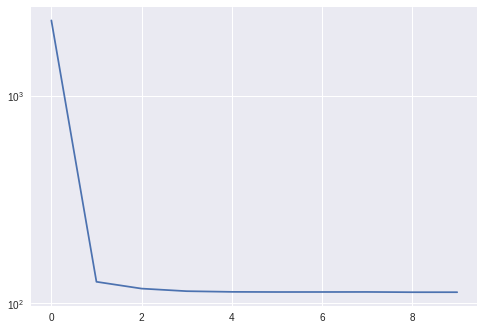

In [37]:
encoding_dim = 2

input_data = Input(shape=(4,))
# notice relu
encoded = Dense(units=encoding_dim, activation='relu', name="encoder")(input_data)
decoded = Dense(units=4, activation='linear', name="decoder")(encoded)

autoencoder = Model(inputs=input_data, outputs=decoded)
# adam = keras.optimizers.Adam(lr=0.01)
adam = keras.optimizers.Adam()
autoencoder.compile(optimizer=adam, loss='mse')
BATCH_SIZE = 1
%time history = autoencoder.fit(X, X, epochs=10, batch_size=BATCH_SIZE, shuffle=True, verbose=1)
plt.yscale('log')
plt.plot(history.history['loss'])

In [38]:
samples

,speed,age,miles,group
0,99.0,22.0,10.0,2
1,107.0,47.0,12.0,1
2,95.0,24.0,17.0,2
3,104.0,41.0,22.0,1
4,104.0,25.0,17.0,2
5,116.0,31.0,14.0,1
6,106.0,28.0,18.0,1
7,113.0,40.0,47.0,1
8,128.0,39.0,13.0,0
9,143.0,48.0,39.0,1


In [39]:
# all groups close to 1, all off as they might not add to a big error
predictions = pd.DataFrame(autoencoder.predict(samples), columns=["speed",	"age",	"miles",	"group"])
predictions

,speed,age,miles,group
0,90.831955,34.324257,23.265129,0.977709
1,105.609444,39.953819,27.355019,1.074907
2,89.820305,33.938866,22.985138,0.971056
3,103.617081,39.194817,26.803600,1.061802
4,97.423180,36.835220,25.089348,1.021062
5,108.400497,41.017086,28.127483,1.093265
6,100.286781,37.926121,25.881893,1.039898
7,116.347626,44.044582,30.326969,1.145536
8,120.457848,45.610394,31.464535,1.172571
9,141.298340,53.549683,37.232449,1.309647


### Let's try normalizing the data first (caution: losses do not compare any more)

In [44]:
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')
normalized_df = (df - df.mean()) / df.std()
normalized_df.head()

,speed,age,miles,group
0,-1.391286,-0.057247,-0.356309,0.001632
1,-0.255202,0.526510,-0.421879,0.001632
2,-0.652832,-1.108011,0.233824,-1.222706
3,-1.448090,-1.166386,-1.339863,1.225971
4,-0.482419,-0.407502,-0.553020,0.001632


Epoch 1/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.9739
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6640
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4953
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4230
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3883
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3670
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3547
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3472
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3410
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3382
CPU times: user 1min 5s, sys: 9.24 s, total: 1min 14s
Wall time: 52.5 s


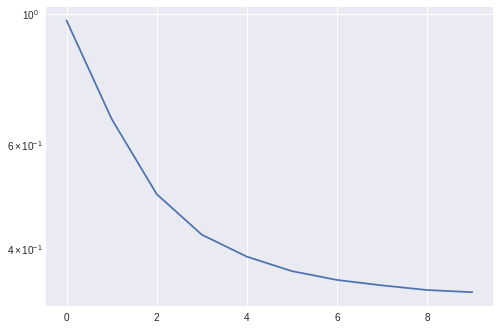

In [45]:
X = normalized_df
encoding_dim = 2

input_data = Input(shape=(4,))
# notice relu
encoded = Dense(units=encoding_dim, activation='relu', name="encoder")(input_data)
decoded = Dense(units=4, activation='linear', name="decoder")(encoded)

autoencoder = Model(inputs=input_data, outputs=decoded)
# adam = keras.optimizers.Adam(lr=0.01)
adam = keras.optimizers.Adam()
autoencoder.compile(optimizer=adam, loss='mse')
BATCH_SIZE = 1
%time history = autoencoder.fit(X, X, epochs=10, batch_size=BATCH_SIZE, shuffle=True, verbose=1)
plt.yscale('log')
plt.plot(history.history['loss'])

## This makes it very hard to estimate how well we did our job, but we can still plot the embedding

Could be interpreted as a fancy version of dimensionality reduction


In [0]:
encoder = Model(inputs=input_data, outputs=encoded)
latent_representation = encoder.predict(X)

In [49]:
latent_representation.shape

(1500, 2)

### Look, ma, clusters

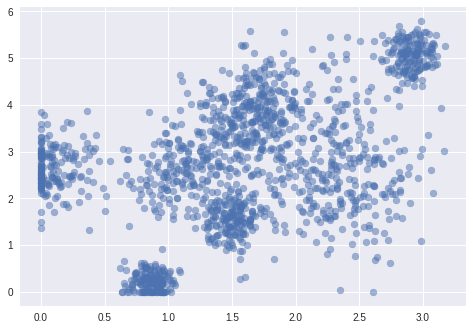

In [55]:
latent_x = latent_representation[:, 0]
latent_y = latent_representation[:, 1]
plt.scatter(latent_x, latent_y, alpha=0.5)

### Clusters have actual meaning

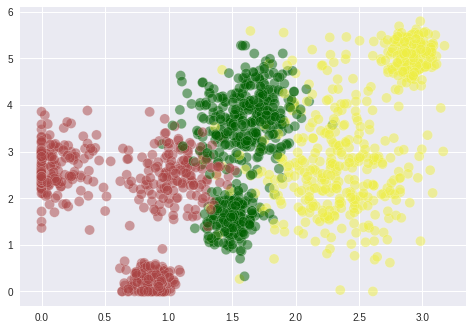

In [75]:
from matplotlib.colors import ListedColormap

# * 0 - red: many accidents
# * 1 - green: few or no accidents
# * 2 - yellow: in the middle
colors = X['group']
color_map = ListedColormap(['#AA4444', '#006000', '#EEEE44'])

plt.scatter(latent_x, latent_y, alpha=0.5, s=100, marker='o', edgecolors='w', cmap=color_map, c=colors)

## But color still was not encoded properly: one-hot

In [0]:
from tensorflow.keras.utils import to_categorical

df = pd.read_csv('./insurance-customers-1500.csv', sep=';')
one_hot_groups = pd.DataFrame(to_categorical(df['group']), columns={'red', 'green', 'yellow'})
main = df.drop('group', axis='columns')

In [125]:
main.head()

,speed,age,miles
0,98.0,44.0,25.0
1,118.0,54.0,24.0
2,111.0,26.0,34.0
3,97.0,25.0,10.0
4,114.0,38.0,22.0


In [126]:
one_hot_groups.head()

,green,red,yellow
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


### Challenge: we could feed in both parts in a united way, but they need different loss functions

* write a custom loss function that does this and balances the value: https://keras.io/losses/
* create multi-in/out model that makes this a little bit more transparent: https://keras.io/getting-started/functional-api-guide/#multi-input-and-multi-output-models

In [0]:
# first multi in
main_input = Input(shape=(3,), name='main_input')
group_input = Input(shape=(3,), name='group_input')

# hopefully this balances out inputs to same scale
encoded_main = Dense(units=2, activation='relu', name="main_encoder")(main_input)
encoded_group = Dense(units=2, activation='relu', name="group_encoder")(group_input)

In [0]:
# latent representation

from tensorflow.keras.layers import concatenate, average, add

merged = concatenate([encoded_main, encoded_group])
# this might work as well
# merged = average([encoded_main, encoded_group])

# the effective latent encoding
encoding_dim = 2
encoded = Dense(units=encoding_dim, activation='relu', name="encoder")(merged)

In [0]:
# then multi out

main_output = Dense(units=3, activation='linear', name="main_output")(encoded)
group_output = Dense(units=3, activation='softmax', name="group_output")(encoded)

autoencoder = Model(inputs=[main_input, group_input], outputs=[main_output, group_output])

In [172]:
autoencoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 3)            0                                            
__________________________________________________________________________________________________
group_input (InputLayer)        (None, 3)            0                                            
__________________________________________________________________________________________________
main_encoder (Dense)            (None, 2)            8           main_input[0][0]                 
__________________________________________________________________________________________________
group_encoder (Dense)           (None, 2)            8           group_input[0][0]                
__________________________________________________________________________________________________
concatenat

In [0]:
adam = keras.optimizers.Adam(lr=0.01)
# adam = keras.optimizers.Adam()

autoencoder.compile(optimizer=adam,
              loss={'main_output': 'mse', 'group_output': 'categorical_crossentropy'},
              loss_weights={'main_output': 1., 'group_output': 5000.})

In [181]:
BATCH_SIZE = 1
EPOCHS=10

%time history = autoencoder.fit(\
    x={'main_input': main, 'group_input': one_hot_groups},\
    y={'main_output': main, 'group_output': one_hot_groups},\
    epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True, verbose=1)

Epoch 1/3
1500/1500 [==============================] - 11s 7ms/step - loss: 275.8556 - main_output_loss: 264.4707 - group_output_loss: 0.0011
Epoch 2/3
1500/1500 [==============================] - 11s 7ms/step - loss: 1701.3783 - main_output_loss: 261.9716 - group_output_loss: 0.1439
Epoch 3/3
1500/1500 [==============================] - 11s 7ms/step - loss: 4939.7232 - main_output_loss: 267.4034 - group_output_loss: 0.4672
CPU times: user 41.6 s, sys: 5.61 s, total: 47.2 s
Wall time: 33.1 s


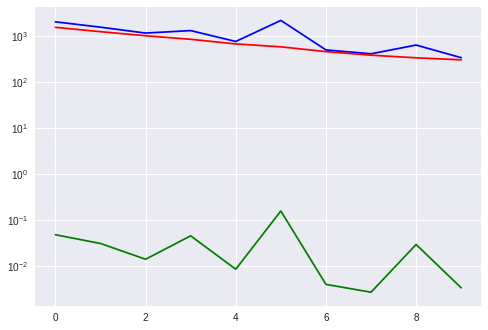

In [179]:
plt.yscale('log')
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['main_output_loss'], 'r')
plt.plot(history.history['group_output_loss'], 'g')

In [0]:
samples = df.sample(10).reset_index(drop=True)
main_samples = samples.drop('group', axis='columns')
group_samples = pd.DataFrame(to_categorical(samples['group']), columns={'red', 'green', 'yellow'})

In [215]:
merged_samples = pd.concat([main_samples, group_samples], axis=1)
merged_samples

,speed,age,miles,green,red,yellow
0,144.0,40.0,44.0,0.0,1.0,0.0
1,130.0,54.0,45.0,0.0,0.0,1.0
2,114.0,84.0,20.0,1.0,0.0,0.0
3,128.0,54.0,47.0,0.0,0.0,1.0
4,115.0,25.0,44.0,0.0,0.0,1.0
5,145.0,46.0,49.0,0.0,1.0,0.0
6,100.0,32.0,51.0,0.0,0.0,1.0
7,113.0,39.0,33.0,0.0,1.0,0.0
8,117.0,67.0,49.0,0.0,0.0,1.0
9,105.0,42.0,21.0,0.0,1.0,0.0


In [217]:
autoencoder.predict([main_samples, group_samples])

[array([[115.4825  ,  43.659084,  27.636248],
        [115.4825  ,  43.659084,  27.636248],
        [131.44783 ,  44.02333 ,  34.91829 ],
        [115.4825  ,  43.659084,  27.636248],
        [115.4825  ,  43.659084,  27.636248],
        [115.4825  ,  43.659084,  27.636248],
        [115.4825  ,  43.659084,  27.636248],
        [115.4825  ,  43.659084,  27.636248],
        [115.4825  ,  43.659084,  27.636248],
        [115.4825  ,  43.659084,  27.636248]], dtype=float32),
 array([[8.8927843e-09, 4.9260598e-01, 5.0739402e-01],
        [8.8927843e-09, 4.9260598e-01, 5.0739402e-01],
        [9.9982977e-01, 0.0000000e+00, 1.7025038e-04],
        [8.8927843e-09, 4.9260598e-01, 5.0739402e-01],
        [8.8927843e-09, 4.9260598e-01, 5.0739402e-01],
        [8.8927843e-09, 4.9260598e-01, 5.0739402e-01],
        [8.8927843e-09, 4.9260598e-01, 5.0739402e-01],
        [8.8927843e-09, 4.9260598e-01, 5.0739402e-01],
        [8.8927843e-09, 4.9260598e-01, 5.0739402e-01],
        [8.8927843e-09, 4.92

In [0]:
encoder = Model(inputs=[main_input, group_input], outputs=encoded)
latent_representation = encoder.predict(x={'main_input': main, 'group_input': one_hot_groups})

In [221]:
latent_representation.shape

(1500, 2)

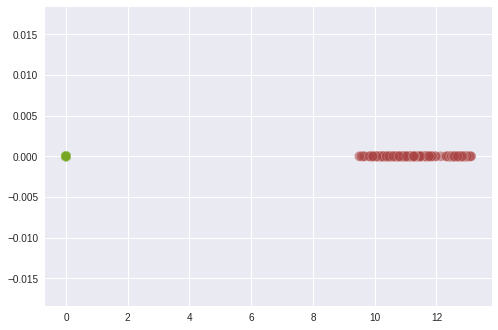

In [225]:
from matplotlib.colors import ListedColormap

# * 0 - red: many accidents
# * 1 - green: few or no accidents
# * 2 - yellow: in the middle
colors = X['group']
color_map = ListedColormap(['#AA4444', '#006000', '#EEEE44'])

latent_x = latent_representation[:, 0]
latent_y = latent_representation[:, 1]

plt.scatter(latent_x, latent_y, alpha=0.5, s=100, marker='o', edgecolors='w', cmap=color_map, c=colors)